# Pymaceuticals Inc.
---

### Analysis


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, dtype=object)
study_results = pd.read_csv(study_results_path, dtype=object)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")


# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
1,f932,0,45,0,Ketapril,Male,15,29
2,g107,0,45,0,Ketapril,Female,2,29
3,a457,0,45,0,Ketapril,Female,11,30
4,c819,0,45,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# len(combined_df['Mouse ID'])
len(mouse_metadata['Mouse ID'])

249

In [3]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicated = mouse_metadata.duplicated(subset=['Mouse ID'], keep= False)
# duplicated
duplicate = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate['Mouse ID'].unique

<bound method Series.unique of 107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object>

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45,0,Propriva,Female,21,26
137,g989,0,45,0,Propriva,Female,21,26
329,g989,5,48.78680146,0,Propriva,Female,21,26
360,g989,5,47.57039208,0,Propriva,Female,21,26
620,g989,10,51.74515613,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)


248

In [19]:
new_combined = pd.merge(study_results, clean_df, on= 'Mouse ID', how= 'left')
new_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
1,f932,0,45,0,Ketapril,Male,15,29
2,g107,0,45,0,Ketapril,Female,2,29
3,a457,0,45,0,Ketapril,Female,11,30
4,c819,0,45,0,Ketapril,Male,21,25


In [21]:
# Convert columns to float
cols = ['Timepoint','Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)']
# new_combined['Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)'] = new_combined['Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)'].astype(int)
new_combined[cols] = new_combined[cols].astype(float)

Mouse ID               object
Timepoint             float64
Tumor Volume (mm3)    float64
Metastatic Sites      float64
Drug Regimen           object
Sex                    object
Age_months            float64
Weight (g)            float64
dtype: object

## Summary Statistics

In [22]:
# Group by drug regimen
grouped_df = new_combined.groupby('Drug Regimen')

In [23]:
# Calculate  tumor volume mean
vol_mean = grouped_df['Tumor Volume (mm3)'].mean()

In [24]:
# Calculate tumor volume median
vol_median = grouped_df['Tumor Volume (mm3)'].median()

In [25]:
# Calculate tumor volume variance
vol_var = grouped_df['Tumor Volume (mm3)'].var()

In [26]:
# Calculate tumor volume standard deviation
vol_std = grouped_df['Tumor Volume (mm3)'].std()

In [27]:
# Calculate tumor volume SEM
vol_sem = grouped_df['Tumor Volume (mm3)'].sem()

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary = {
    'Mean Tumor Volume': vol_mean,
    'Median Tumor Volume': vol_median, 
    'Tumor Volume Variance': vol_var, 
    'Tumor Volume Std. Dev.': vol_std,
    'Tumor Volume Std. Err.': vol_sem
}

pd.DataFrame(summary)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_2 = grouped_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

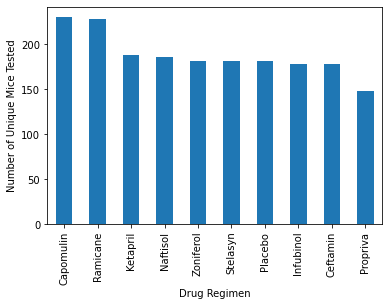

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_count = new_combined.groupby(["Drug Regimen"], sort=True).count()["Mouse ID"]

unique_mice = mouse_count.sort_values(ascending = False).plot(kind = "bar")
unique_mice.set_xlabel("Drug Regimen")
unique_mice.set_ylabel("Number of Unique Mice Tested")
unique_mice

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

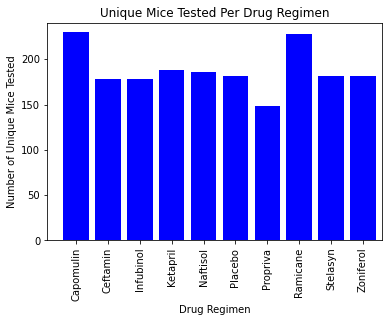

In [36]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
plt.figure()
x_axis = np.arange(0, len(mouse_count))
tick_locations = [value+0.4 for value in x_axis]
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
mice = [230,178,178,188,186,181,148,228,181,182] 
plt.bar(drugs, mice, color= 'b', align='edge')
plt.xticks(tick_locations, drugs, rotation = 'vertical')
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(mouse_count)+10)
plt.title("Unique Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


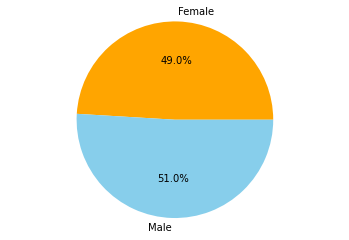

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [922, 958]
colors = ['orange', 'skyblue']
plt.pie(sizes, labels= labels, colors= colors, autopct="%1.1f%%")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


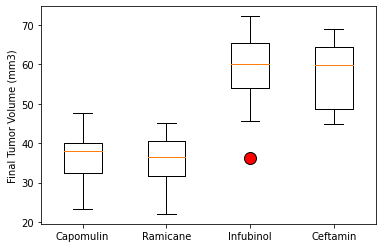

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

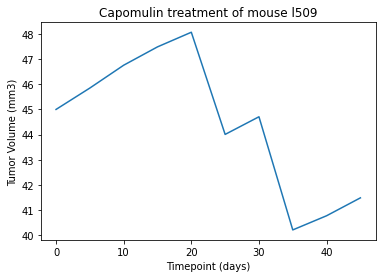

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



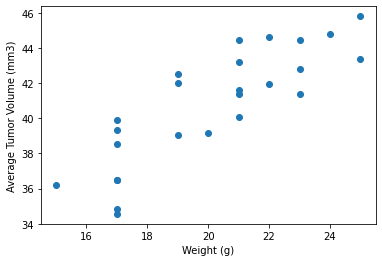

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


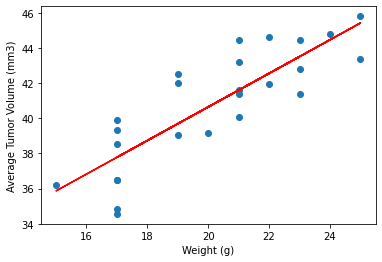

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

